In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns
import time
from scipy import stats
%matplotlib inline

In [3]:
df_hd_raw = pd.read_csv("data/kc_house_data.csv")

In [4]:
df_hd_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df_hd_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# creating new column that converts date into a time stamp which is the number of seconds since 1/1/1970 (aka UTC)
df_hd = df_hd_raw.copy()
df_hd['time_stamp'] = [time.mktime(time.strptime(x, '%m/%d/%Y')) for x in df_hd['date']]
df_hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09


In [7]:
df_hd.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
time_stamp      -0.004002
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [8]:
# creating data frame with only numeric columns
df_hd_numeric = df_hd.select_dtypes(include='number')
df_hd_numeric.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09


In [9]:
df_hd_numeric.shape

(21597, 16)

Checking for Linearity

In [10]:
# creating function that takes in a df and target column name (as a string) and creates scatter plot from all other columns
def scatter(df, target_column):
    #n_rows = int((len(df.columns)/3)) + 1
    #fig, axes = plt.subplots(ncols=1, nrows=(len(df.columns)-1), figsize=(15,10), sharey=True)
    #axes[0].set_ylabel(target_column)
    
    for col in (df.drop(target_column, axis=1).columns):
        df.plot(kind='scatter', x=col, y=target_column, alpha = 0.1, figsize=(10,8))

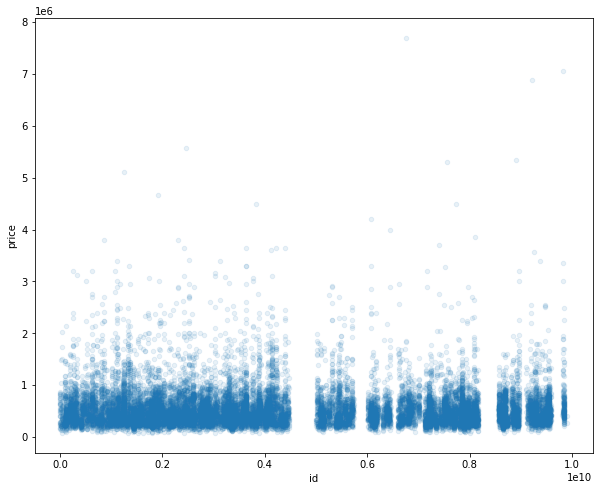

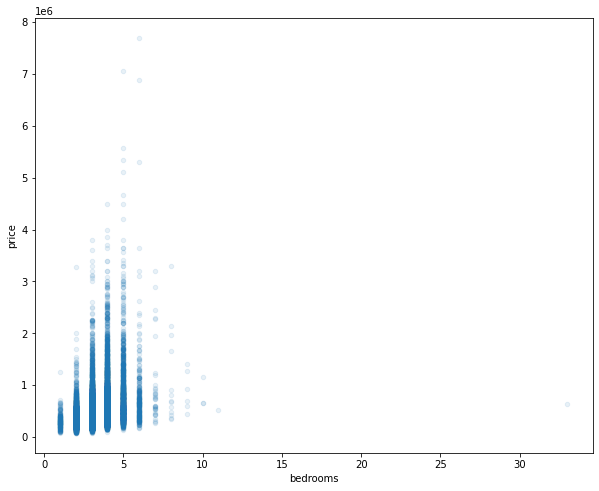

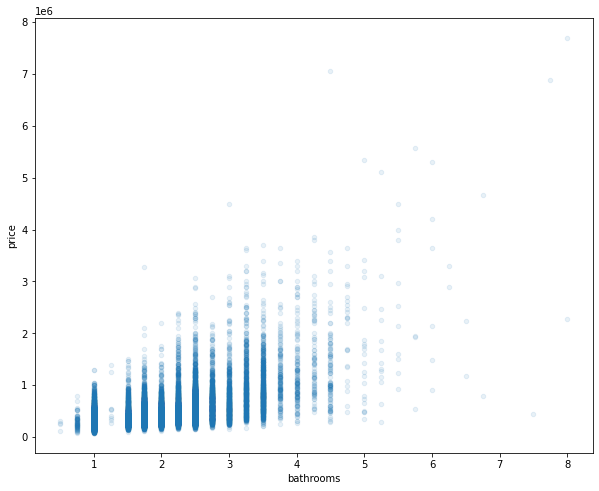

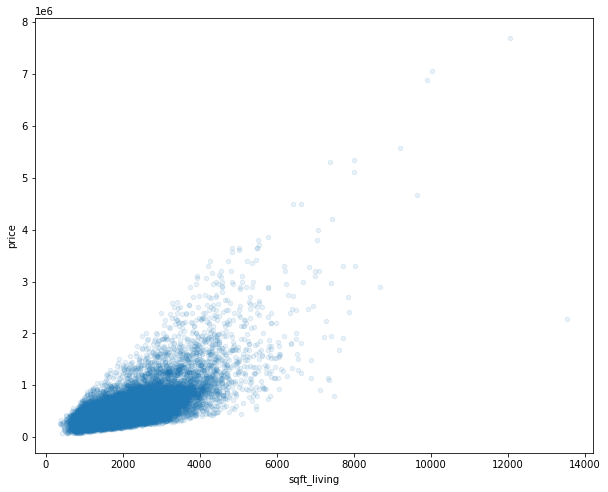

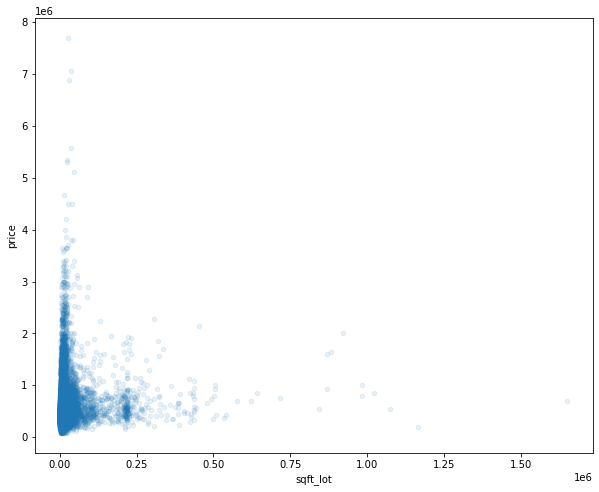

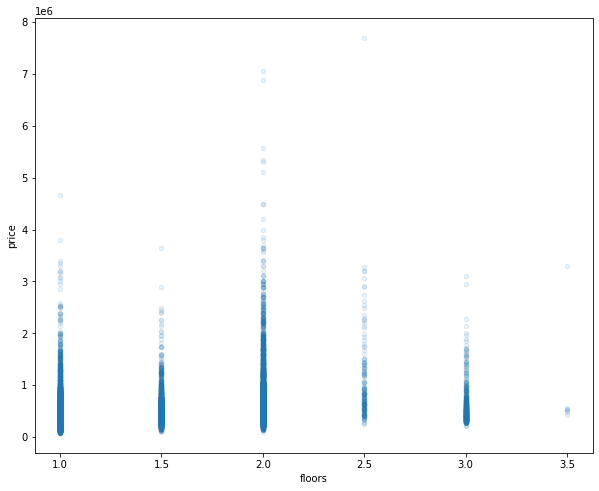

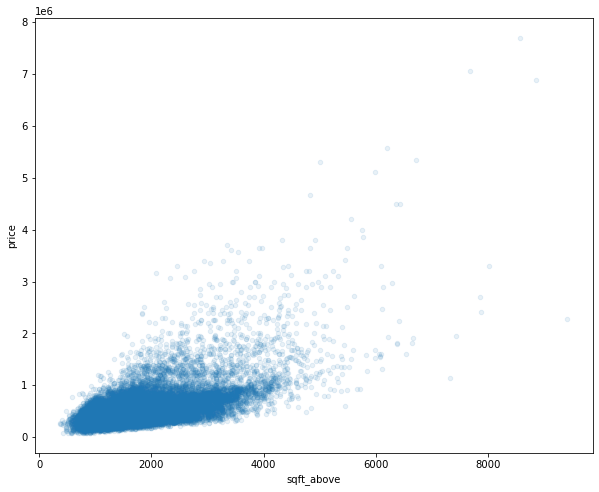

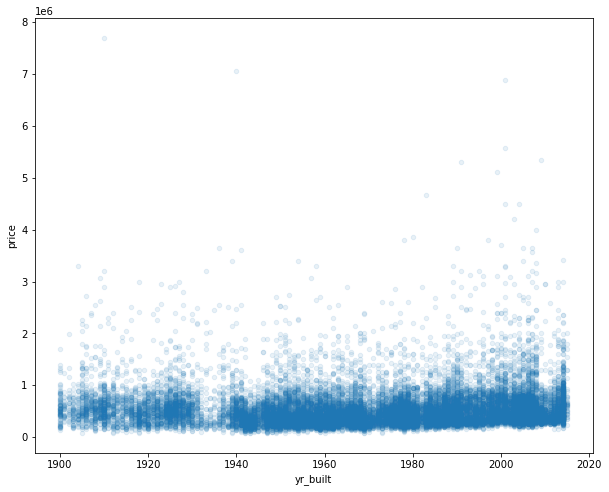

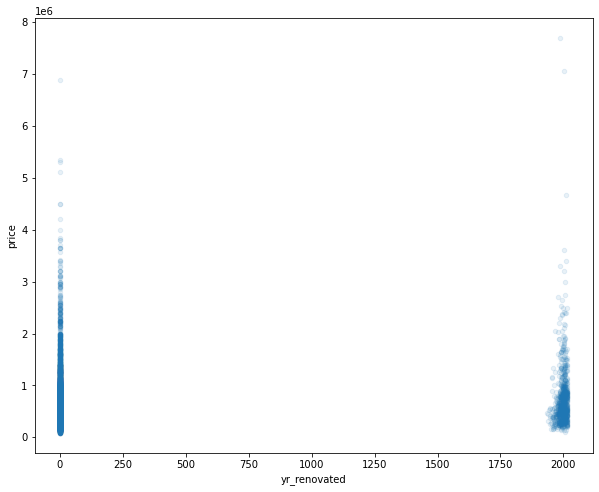

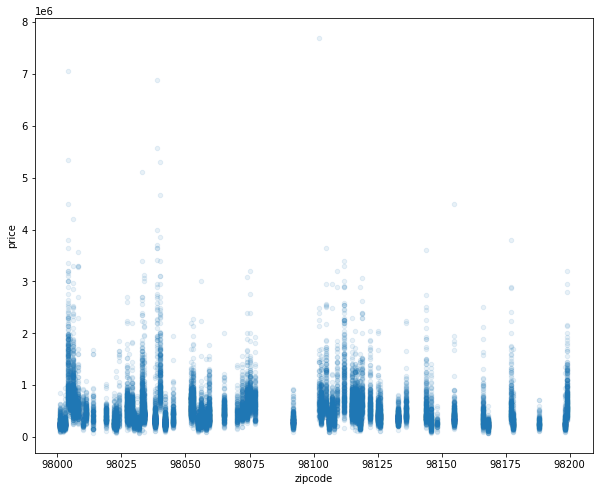

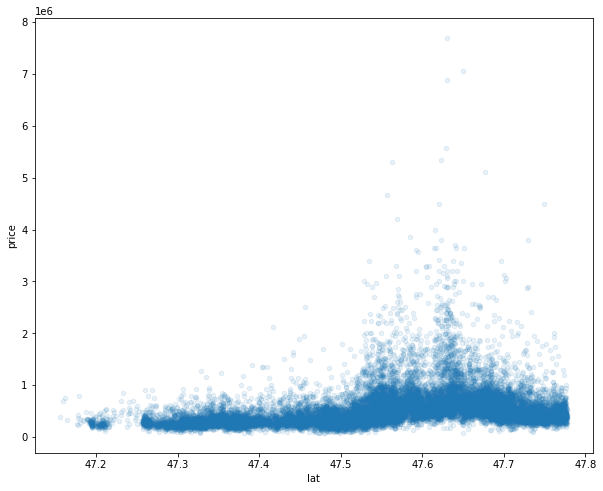

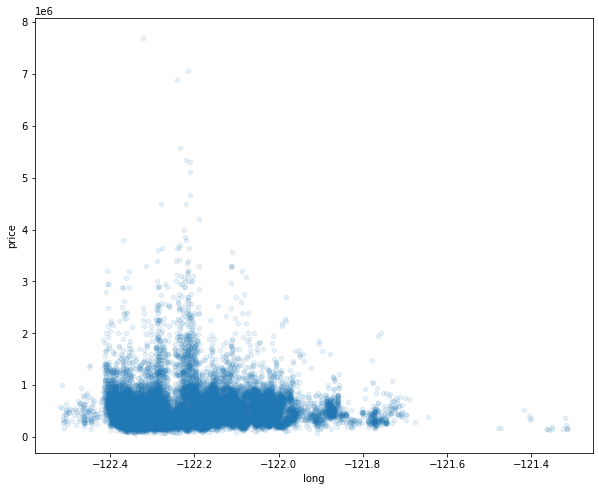

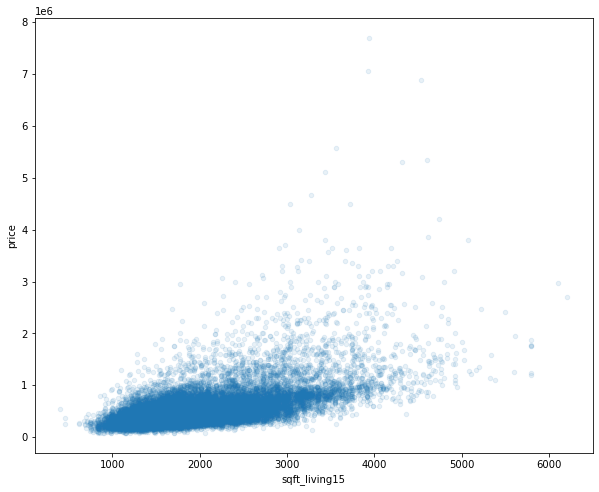

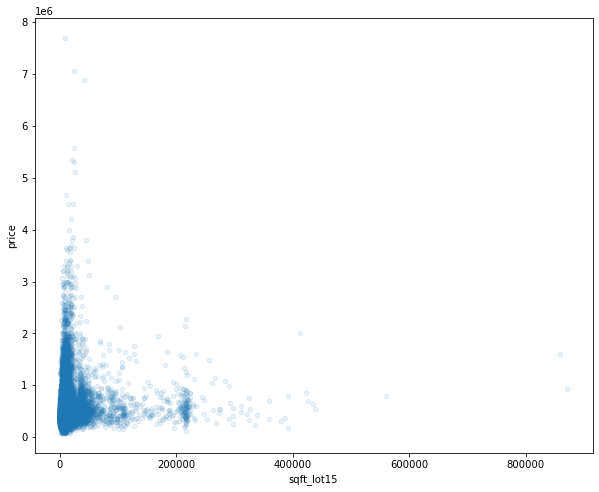

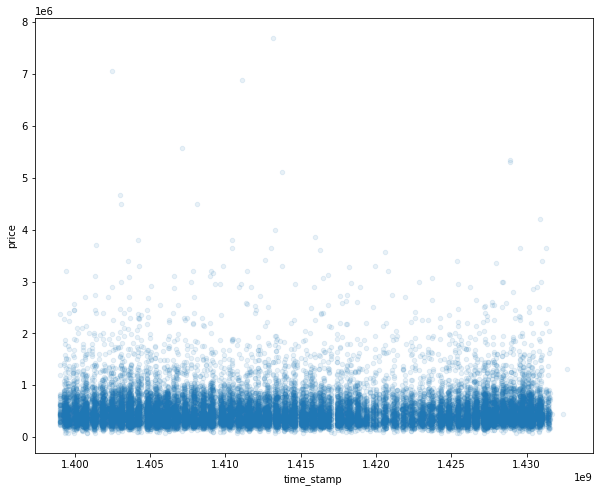

In [11]:
scatter(df_hd_numeric, "price")

In [12]:
df_hd_numeric.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
time_stamp      -0.004002
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [13]:
df_hd_numeric.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
time_stamp          0
dtype: int64

In [14]:
# creating variables for model (droping target column ('price'), 'yr_renovated' becuase it contains large amount (~20%) of missing data and 'zipcode','id', 'lat' and 'long' becuase it is more categorical than numeric)
X = df_hd_numeric.drop(['price', 'yr_renovated', 'zipcode', 'id', 'lat', 'long'], axis=1)
X_c = sm.add_constant(X)
Y = df_hd_numeric['price']

In [15]:
# creating linear regression model and printing summary
model = sm.OLS(endog=Y, exog=X_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2862.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:23:31   Log-Likelihood:            -2.9828e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21586   BIC:                         5.967e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.437e+06   2.71e+05     20.026      0.000     4.9e+06    5.97e+06
bedrooms      -6.614e+04   2224.903    -29.727      0.000   -7.05e+04   -6.18e+04
bathrooms      6.975e+04   3855.139     18.093      0.000    6.22e+04    7.73e+04
sqft_living     258.9032      4.977     52.019      0.000     249.148     268.659
sqft_lot          0.0170      0.057      0.298      0.766      -0.095       0.129
floors         5.976e+04   4160.511     14.364      0.000    5.16e+04    6.79e+04
sqft_above      -10.6507      4.954     -2.150      0.032     -20.360      -0.941
yr_built      -3579.2540     70.732    -50.603      0.000   -3717.895   -3440.613
sqft_living15    93.6540      3.807     24.603      0.000      86.193     101.115
sqft_lot15       -0.6982      0.087     -7.996      0.000      -0.869      -0.527
time_stamp        0.0010      0.000      6.090      0.000       0.001       0.001
==============================================================================
Omnibus:                    15540.651   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728292.384
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      30.830   Cond. No.                     2.34e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

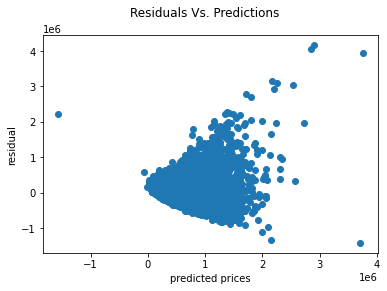

In [16]:
# plotting residuals vs predictions
model_preds = model.predict(X_c)
resids = Y - model_preds

fig, ax = plt.subplots()
ax.scatter(model_preds, resids)
ax.set_xlabel('predicted prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

Checking for Indpendence

In [17]:
# checking durban-watson score of residuals
dw = sm.stats.stattools.durbin_watson
dw(resids)

model.summary().tables[2]

Omnibus:,15540.651,Durbin-Watson:,1.986
Prob(Omnibus):,0.000,Jarque-Bera (JB):,728292.384
Skew:,2.951,Prob(JB):,0.00
Kurtosis:,30.830,Cond. No.,2.34e+11


Exploring Location Data (lat & long)

In [18]:
# installing and importing haversine library for geo-location calculations
!pip install haversine
import haversine as hs

In [19]:
# initializing and formating location variables
loc1 = list(zip(df_hd_numeric['lat'], df_hd_numeric['long']))
loc2 = (47.6050, -122.3344)

In [20]:
# creating new dataframe from df_hd_numeric with new column for house distance from downtown seattle
df_hd_numeric_w_loc = df_hd_numeric.copy()
df_hd_numeric_w_loc['Distance_from_DTSeattle'] = [hs.haversine((x,y), loc2, unit='mi') for x,y in loc1]
df_hd_numeric_w_loc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09,7.418041
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09,8.046810
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09,10.323554
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09,6.427255
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09,13.504920


In [21]:
df_hd_numeric_w_loc.corr()['price'].sort_values(ascending=False)

price                      1.000000
sqft_living                0.701917
sqft_above                 0.605368
sqft_living15              0.585241
bathrooms                  0.525906
bedrooms                   0.308787
lat                        0.306692
floors                     0.256804
yr_renovated               0.129599
sqft_lot                   0.089876
sqft_lot15                 0.082845
yr_built                   0.053953
long                       0.022036
time_stamp                -0.004002
id                        -0.016772
zipcode                   -0.053402
Distance_from_DTSeattle   -0.282822
Name: price, dtype: float64

Ordinal encoding 'condition' (categorical variable) and adding to numeric df (Jon's work)

In [22]:
categories = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords = OrdinalEncoder(categories=categories)

cond_df = pd.DataFrame(df_hd['condition'])

ords.fit(cond_df)
cond_ords = ords.transform(cond_df)
cond_ords

cond_encoded = pd.DataFrame(ords.transform(cond_df))

df_hd_ords_loc = pd.concat([df_hd_numeric_w_loc, cond_encoded], axis=1)
df_hd_ords_loc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09,7.418041,2.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09,8.046810,2.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09,10.323554,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09,6.427255,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09,13.504920,2.0


In [23]:
df_hd_drop = df_hd_ords_loc.drop(['id','price', 'yr_renovated', 'zipcode', 'lat', 'long', 'time_stamp'], axis=1)

In [24]:
ss = StandardScaler().fit(df_hd_drop)
df_hd_drop_scaled = ss.transform(df_hd_drop)

X2 = df_hd_drop_scaled
X2_c = sm.add_constant(X2)
Y2 = df_hd_ords_loc['price']

model_ord_loc = sm.OLS(endog=Y2, exog=X2_c).fit()
model_ord_loc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3632.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:23:33   Log-Likelihood:            -2.9608e+05
No. Observations:               21597   AIC:                         5.922e+05
Df Residuals:                   21585   BIC:                         5.923e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1480.829    364.861      0.000    5.37e+05    5.43e+05
x1          -5.15e+04   1869.681    -27.547      0.000   -5.52e+04   -4.78e+04
x2           4.15e+04   2684.740     15.457      0.000    3.62e+04    4.68e+04
x3          1.781e+05   4214.278     42.262      0.000     1.7e+05    1.86e+05
x4          1.303e+04   2144.556      6.077      0.000    8828.530    1.72e+04
x5         -4315.4916   2108.199     -2.047      0.041   -8447.717    -183.266
x6          5.855e+04   3826.968     15.298      0.000     5.1e+04     6.6e+04
x7         -3.786e+04   2147.754    -17.627      0.000   -4.21e+04   -3.36e+04
x8          6.504e+04   2355.854     27.607      0.000    6.04e+04    6.97e+04
x9          -701.2161   2168.070     -0.323      0.746   -4950.793    3548.361
x10        -1.249e+05   1791.933    -69.701      0.000   -1.28e+05   -1.21e+05
x11         2.189e+04   1619.500     13.518      0.000    1.87e+04    2.51e+04
==============================================================================
Omnibus:                    18009.444   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1354576.364
Skew:                           3.556   Prob(JB):                         0.00
Kurtosis:                      41.141   Cond. No.                         7.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df_hd_drop.columns

Index([               'bedrooms',               'bathrooms',
                   'sqft_living',                'sqft_lot',
                        'floors',              'sqft_above',
                      'yr_built',           'sqft_living15',
                    'sqft_lot15', 'Distance_from_DTSeattle',
                               0],
      dtype='object')

## Resale Dataframe Investigation

In [26]:
# creating new column with a count of the number of times the house 'id' appears in the df
df_hd_sale_count = df_hd_ords_loc.copy()
df_hd_sale_count['sale_count'] = df_hd_sale_count.groupby('id')['id'].transform('count')
df_hd_sale_count.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09,7.418041,2.0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09,8.046810,2.0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09,10.323554,2.0,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09,6.427255,4.0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09,13.504920,2.0,1
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930,1.399867e+09,15.738849,2.0,1
6,1321400060,257500.0,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,1.403842e+09,20.406215,2.0,1
7,2008000270,291850.0,3,1.50,1060,9711,1.0,1060,1963,0.0,98198,47.4095,-122.315,1650,9711,1.421298e+09,13.538076,2.0,1
8,2414600126,229500.0,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113,1.429070e+09,6.406107,2.0,1
9,3793500160,323000.0,3,2.50,1890,6560,2.0,1890,2003,0.0,98038,47.3684,-122.031,2390,7570,1.426133e+09,21.631305,2.0,1


In [27]:
df_hd_sale_count['sale_count'].value_counts()

1    21244
2      350
3        3
Name: sale_count, dtype: int64

In [28]:
# creating new df that contains only houses that were resold
df_hd_resale = df_hd_sale_count.loc[df_hd_sale_count['sale_count'] > 1]
df_hd_resale.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count
93,6021501535,430000.0,3,1.50,1580,5000,1.0,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1.406261e+09,6.153774,2.0,2
94,6021501535,700000.0,3,1.50,1580,5000,1.0,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1.419311e+09,6.153774,2.0,2
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1.403064e+09,11.472505,2.0,2
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1.418101e+09,11.472505,2.0,2
324,7520000520,232000.0,2,1.00,1240,12092,1.0,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.409890e+09,7.596381,2.0,2
325,7520000520,240500.0,2,1.00,1240,12092,1.0,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.426046e+09,7.596381,2.0,2
345,3969300030,165000.0,4,1.00,1000,7134,1.0,1000,1943,0.0,98178,47.4897,-122.240,1020,7138,1.406088e+09,9.102016,2.0,2
346,3969300030,239900.0,4,1.00,1000,7134,1.0,1000,1943,NaN,98178,47.4897,-122.240,1020,7138,1.419829e+09,9.102016,2.0,2
371,2231500030,315000.0,4,2.25,2180,10754,1.0,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1.412136e+09,11.480522,4.0,2
372,2231500030,530000.0,4,2.25,2180,10754,1.0,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1.427170e+09,11.480522,4.0,2


In [29]:
# creating new column in df_hd_resale to differentiate the first and second sales
df_hd_resale_dup = df_hd_resale.copy()
df_hd_resale_dup['dup'] = df_hd_resale.duplicated(subset='id')
df_hd_resale_dup.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup
93,6021501535,430000.0,3,1.50,1580,5000,1.0,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1.406261e+09,6.153774,2.0,2,False
94,6021501535,700000.0,3,1.50,1580,5000,1.0,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1.419311e+09,6.153774,2.0,2,True
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1.403064e+09,11.472505,2.0,2,False
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1.418101e+09,11.472505,2.0,2,True
324,7520000520,232000.0,2,1.00,1240,12092,1.0,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.409890e+09,7.596381,2.0,2,False


In [30]:
# creating df for original sales
df_hd_resale_ogsale = df_hd_resale_dup[df_hd_resale_dup['dup'] == False]

In [31]:
# creating df for second sales
df_hd_resale_secsale = df_hd_resale_dup[df_hd_resale_dup['dup'] == True]

In [32]:
# dropping the the one house that sold twice to allow each df to have same shape
df_hd_resale_secsale.drop_duplicates(subset='id', inplace = True)

<ipython-input-32-ba785bec199a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hd_resale_secsale.drop_duplicates(subset='id', inplace = True)


In [33]:
# checking shape
df_hd_resale_secsale.shape

(176, 20)

In [34]:
# checking shape
df_hd_resale_ogsale.shape

(176, 20)

In [35]:
# setting index of original sale df to 'id' columns
df_hd_resale_ogsale.set_index(keys='id', inplace=True)
df_hd_resale_ogsale.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup
id,,,,,,,,,,,,,,,,,,,
6021501535,430000.0,3,1.50,1580,5000,1.0,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1.406261e+09,6.153774,2.0,2,False
4139480200,1380000.0,4,3.25,4290,12103,1.0,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1.403064e+09,11.472505,2.0,2,False
7520000520,232000.0,2,1.00,1240,12092,1.0,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.409890e+09,7.596381,2.0,2,False
3969300030,165000.0,4,1.00,1000,7134,1.0,1000,1943,0.0,98178,47.4897,-122.240,1020,7138,1.406088e+09,9.102016,2.0,2,False
2231500030,315000.0,4,2.25,2180,10754,1.0,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1.412136e+09,11.480522,4.0,2,False


In [36]:
# sorting index to confirm set index correct and get in same order as second sale
df_hd_resale_ogsale.sort_index(inplace=True)
df_hd_resale_ogsale.head()

<ipython-input-36-e45c0c53d46e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hd_resale_ogsale.sort_index(inplace=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup
id,,,,,,,,,,,,,,,,,,,
1000102,280000.0,6,3.00,2400,9373,2.0,2400,1991,0.0,98002,47.3262,-122.214,2060,7316,1.410840e+09,20.067377,2.0,2,False
7200179,150000.0,2,1.00,840,12750,1.0,840,1925,0.0,98055,47.4840,-122.211,1480,6969,1.413432e+09,10.149774,2.0,2,False
109200390,245000.0,3,1.75,1480,3900,1.0,1480,1980,0.0,98023,47.2977,-122.367,1830,6956,1.408507e+09,21.286970,3.0,2,False
123039336,148000.0,1,1.00,620,8261,1.0,620,1939,0.0,98106,47.5138,-122.364,1180,8244,1.402459e+09,6.450689,2.0,2,False
251300110,225000.0,3,2.25,2510,12013,2.0,2510,1988,0.0,98003,47.3473,-122.314,1870,8017,1.406779e+09,17.830843,2.0,2,False


In [37]:
# setting index of second sale df to 'id' columns
df_hd_resale_secsale.set_index(keys='id', inplace=True)

In [38]:
# sorting index to confirm set index correct and get in same order as original sale
df_hd_resale_secsale.sort_index(inplace=True)
df_hd_resale_secsale.head()

<ipython-input-38-1015d5ffc98d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hd_resale_secsale.sort_index(inplace=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup
id,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,2400,1991,0.0,98002,47.3262,-122.214,2060,7316,1.429675e+09,20.067377,2.0,2,True
7200179,175000.0,2,1.00,840,12750,1.0,840,1925,NaN,98055,47.4840,-122.211,1480,6969,1.429848e+09,10.149774,2.0,2,True
109200390,250000.0,3,1.75,1480,3900,1.0,1480,1980,0.0,98023,47.2977,-122.367,1830,6956,1.413778e+09,21.286970,3.0,2,True
123039336,244900.0,1,1.00,620,8261,1.0,620,1939,NaN,98106,47.5138,-122.364,1180,8244,1.418015e+09,6.450689,2.0,2,True
251300110,358000.0,3,2.25,2510,12013,2.0,2510,1988,0.0,98003,47.3473,-122.314,1870,8017,1.421212e+09,17.830843,2.0,2,True


In [39]:
delta_price = (df_hd_resale_secsale['price'] - df_hd_resale_ogsale['price'])
type(delta_price.index)

pandas.core.indexes.numeric.Int64Index

In [40]:
delta_price

id
1000102        20000.0
7200179        25000.0
109200390       5000.0
123039336      96900.0
251300110     133000.0
                ...   
9407110710    127000.0
9809000020     40000.0
9828200460    170000.0
9834200305    265000.0
9834200885    190000.0
Name: price, Length: 176, dtype: float64

In [41]:
df_hd_resale_secsale['price'].mean()

488592.0909090909

In [42]:
df_hd_resale_ogsale['price'].mean()

352211.9715909091

In [43]:
df_hd_resale_delta_price = df_hd_resale_secsale.copy()
type(df_hd_resale_delta_price.index)

pandas.core.indexes.numeric.Int64Index

In [44]:
df_test = df_hd_resale_secsale.copy()
df_test = df_test.join(delta_price, lsuffix='l_')
df_test.head()

,pricel_,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup,price
id,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,2400,1991,0.0,98002,47.3262,-122.214,2060,7316,1.429675e+09,20.067377,2.0,2,True,20000.0
7200179,175000.0,2,1.00,840,12750,1.0,840,1925,NaN,98055,47.4840,-122.211,1480,6969,1.429848e+09,10.149774,2.0,2,True,25000.0
109200390,250000.0,3,1.75,1480,3900,1.0,1480,1980,0.0,98023,47.2977,-122.367,1830,6956,1.413778e+09,21.286970,3.0,2,True,5000.0
123039336,244900.0,1,1.00,620,8261,1.0,620,1939,NaN,98106,47.5138,-122.364,1180,8244,1.418015e+09,6.450689,2.0,2,True,96900.0
251300110,358000.0,3,2.25,2510,12013,2.0,2510,1988,0.0,98003,47.3473,-122.314,1870,8017,1.421212e+09,17.830843,2.0,2,True,133000.0


In [45]:
df_hd_resale_delta_price = df_hd_resale_secsale.copy()
df_hd_resale_delta_price['delta_price'] = delta_price
df_hd_resale_delta_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup,delta_price
id,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,2400,1991,0.0,98002,47.3262,-122.214,2060,7316,1.429675e+09,20.067377,2.0,2,True,20000.0
7200179,175000.0,2,1.00,840,12750,1.0,840,1925,NaN,98055,47.4840,-122.211,1480,6969,1.429848e+09,10.149774,2.0,2,True,25000.0
109200390,250000.0,3,1.75,1480,3900,1.0,1480,1980,0.0,98023,47.2977,-122.367,1830,6956,1.413778e+09,21.286970,3.0,2,True,5000.0
123039336,244900.0,1,1.00,620,8261,1.0,620,1939,NaN,98106,47.5138,-122.364,1180,8244,1.418015e+09,6.450689,2.0,2,True,96900.0
251300110,358000.0,3,2.25,2510,12013,2.0,2510,1988,0.0,98003,47.3473,-122.314,1870,8017,1.421212e+09,17.830843,2.0,2,True,133000.0


In [46]:
df_hd_resale_delta_price.shape

(176, 20)

In [47]:
df_hd_resale_delta_price_drop = df_hd_resale_delta_price.drop(['delta_price','price', 'yr_renovated', 'zipcode', 'lat', 'long', 'sale_count', 'dup'], axis=1)

ss = StandardScaler().fit(df_hd_resale_delta_price_drop)
df_hd_resale_delta_price_drop_scaled = ss.transform(df_hd_resale_delta_price_drop)

X3 = df_hd_resale_delta_price_drop_scaled
X3_c = sm.add_constant(X3)
Y3 = df_hd_resale_delta_price['delta_price']

model_resale_delta_price = sm.OLS(endog=Y3, exog=X3_c).fit()
model_resale_delta_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            delta_price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.442
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.83e-06
Time:                        10:23:33   Log-Likelihood:                -2251.6
No. Observations:                 176   AIC:                             4529.
Df Residuals:                     163   BIC:                             4570.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.364e+05   6819.439     19.999      0.000    1.23e+05     1.5e+05
x1          8055.7733   8711.512      0.925      0.356   -9146.193    2.53e+04
x2          3073.8229   1.21e+04      0.254      0.800   -2.08e+04     2.7e+04
x3          2.395e+04   1.92e+04      1.244      0.215   -1.41e+04    6.19e+04
x4          9184.1054   1.68e+04      0.548      0.584   -2.39e+04    4.23e+04
x5         -1449.5061   1.06e+04     -0.137      0.891   -2.24e+04    1.95e+04
x6          -1.69e+04    1.7e+04     -0.993      0.322   -5.05e+04    1.67e+04
x7         -2.675e+04   1.01e+04     -2.640      0.009   -4.68e+04   -6743.616
x8          -1.13e+04   1.18e+04     -0.957      0.340   -3.46e+04     1.2e+04
x9         -1.351e+04   1.59e+04     -0.849      0.397   -4.49e+04    1.79e+04
x10         8698.7597   7170.457      1.213      0.227   -5460.202    2.29e+04
x11        -2.103e+04   8588.721     -2.448      0.015    -3.8e+04   -4067.921
x12        -5940.9897   6981.432     -0.851      0.396   -1.97e+04    7844.718
==============================================================================
Omnibus:                       11.929   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.514
Skew:                           0.449   Prob(JB):                     0.000428
Kurtosis:                       4.145   Cond. No.                         7.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
df_hd_resale_delta_price_drop.columns

Index([               'bedrooms',               'bathrooms',
                   'sqft_living',                'sqft_lot',
                        'floors',              'sqft_above',
                      'yr_built',           'sqft_living15',
                    'sqft_lot15',              'time_stamp',
       'Distance_from_DTSeattle',                         0],
      dtype='object')

In [49]:
df_hd_resale_delta_price.corr()['delta_price'].map(abs).sort_values(ascending=False)

delta_price                1.000000
yr_built                   0.394895
Distance_from_DTSeattle    0.377746
long                       0.318692
zipcode                    0.309260
lat                        0.305384
sqft_living15              0.203966
sqft_above                 0.195768
sqft_lot15                 0.178694
price                      0.168962
floors                     0.155123
bathrooms                  0.140733
sqft_lot                   0.128085
time_stamp                 0.112506
sale_count                 0.096006
sqft_living                0.089324
yr_renovated               0.083559
bedrooms                   0.068237
0                          0.029785
dup                             NaN
Name: delta_price, dtype: float64

Checking Assumptions for Resale Model

In [50]:
df_hd_resale_delta_price['delta_price'].describe()

count       176.000000
mean     136380.119318
std      100582.443855
min      -40000.000000
25%       65000.000000
50%      118875.000000
75%      199500.000000
max      529950.000000
Name: delta_price, dtype: float64

In [51]:
rvs_resale_delta_price = stats.norm(loc=df_hd_resale_delta_price['delta_price'].mean(), scale=df_hd_resale_delta_price['delta_price'].std())

In [52]:
IQR_resale_delta_price = rvs_resale_delta_price.ppf(0.75) - rvs_resale_delta_price.ppf(0.25)

In [53]:
upper_resale_delta_price  = rvs_resale_delta_price.ppf(0.75) + (1.5*IQR_resale_delta_price)

In [54]:
lower_resale_delta_price  = rvs_resale_delta_price.ppf(0.25) - (1.5*IQR_resale_delta_price)

In [55]:
df_hd_resale_delta_price_drop = df_hd_resale_delta_price.copy()
df_hd_resale_delta_price_drop.drop(df_hd_resale_delta_price_drop[(df_hd_resale_delta_price_drop['delta_price'] >= upper_resale_delta_price) | (df_hd_resale_delta_price_drop['delta_price'] <= lower_resale_delta_price)].index)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,Distance_from_DTSeattle,0,sale_count,dup,delta_price
id,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,2400,1991,0.0,98002,47.3262,-122.214,2060,7316,1.429675e+09,20.067377,2.0,2,True,20000.0
7200179,175000.0,2,1.00,840,12750,1.0,840,1925,NaN,98055,47.4840,-122.211,1480,6969,1.429848e+09,10.149774,2.0,2,True,25000.0
109200390,250000.0,3,1.75,1480,3900,1.0,1480,1980,0.0,98023,47.2977,-122.367,1830,6956,1.413778e+09,21.286970,3.0,2,True,5000.0
123039336,244900.0,1,1.00,620,8261,1.0,620,1939,NaN,98106,47.5138,-122.364,1180,8244,1.418015e+09,6.450689,2.0,2,True,96900.0
251300110,358000.0,3,2.25,2510,12013,2.0,2510,1988,0.0,98003,47.3473,-122.314,1870,8017,1.421212e+09,17.830843,2.0,2,True,133000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407110710,322000.0,3,1.75,1510,8400,1.0,980,1979,0.0,98045,47.4476,-121.771,1500,10125,1.424927e+09,28.446515,1.0,2,True,127000.0
9809000020,1940000.0,5,2.25,3120,16672,2.0,3120,1969,0.0,98004,47.6458,-122.219,3740,17853,1.426219e+09,6.068375,3.0,2,True,40000.0
9828200460,430000.0,2,1.00,700,4800,1.0,700,1922,0.0,98122,47.6147,-122.300,1440,4800,1.420520e+09,1.736902,2.0,2,True,170000.0


Exploring number of houses renovated

In [56]:
reno_isna = sum(df_hd_resale_ts['yr_renovated'].isna())

NameError: name 'df_hd_resale_ts' is not defined

In [ ]:
reno_0 = len(df_hd_resale_ts.loc[df_hd_resale_ts['yr_renovated'] == 0])

In [ ]:
reno_no_data = reno_isna + reno_0
reno_no_data

Visuals for Presentation

In [ ]:
sns.regplot(data=df_hd_ords_loc, x='sqft_living', y='price', scatter_kws={"s":5}, ci=95)
plt.xlabel('Area of Living Space (ft^2)')
plt.ylabel('Price ($)')
plt.title('House Price as function of Area of Living Space', loc='center', pad=20);

In [ ]:
sns.regplot(data=df_hd_ords_loc, x='Distance_from_DTSeattle', y='price', scatter_kws={"s":5}, ci=95)
plt.xlabel('Distance from Downtown Seattle (Mi)')
plt.ylabel('Price ($)')
plt.title('House Price as function of Distance from Downtown Seattle', loc='center', pad=20);

In [ ]:
sns.regplot(data=df_hd_ords_loc, x='sqft_living15', y='price', scatter_kws={"s":5}, ci=95)
plt.xlabel('Area of Living Space of 15 closest neighbors (ft^2)')
plt.ylabel('Price ($)')
plt.title('House Price as function of Area of Living Space of 15 Closest Neighbors', loc='center', pad=20);

In [58]:
resale_model_scaled_df = pd.DataFrame(df_hd_resale_delta_price_drop_scaled)
resale_model_scaled_df.head()
#resale_model_scaled_df.shape

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.643346,1.625799,0.868314,-0.100557,1.693999,1.452437,1.222654,0.463691,-0.204192,0.944355,1.557604,-0.433220
1,-1.249783,-1.096109,-1.196329,0.047578,-0.617193,-1.008871,-1.360531,-0.487202,-0.225296,0.977199,-0.189949,-0.433220
2,-0.276501,-0.075394,-0.349296,-0.340635,-0.617193,0.000896,0.792123,0.086613,-0.226086,-2.077332,1.772505,1.005397
3,-2.223065,-1.096109,-1.487497,-0.149336,-0.617193,-1.355978,-0.812582,-0.979044,-0.147752,-1.271959,-0.841755,-0.433220
4,-0.276501,0.605083,1.013898,0.015249,1.693999,1.625990,1.105236,0.152191,-0.161558,-0.664338,1.163510,-0.433220


In [59]:
y4 = pd.DataFrame(Y3)
y4.head()
y4.shape

(176, 1)

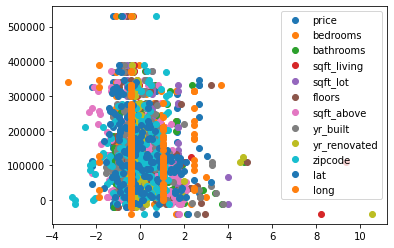

In [60]:
#col_count = 0
for col in resale_model_scaled_df.columns:
    x = resale_model_scaled_df[col]
    y = y4
    plt.plot(x, y, 'o', alpha=1)
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x+b)  
    #while col_count <= 10:
        #m, b = np.polyfit(x, y, 1)
        #plt.plot(x, m*x+b)
        #col_count +=1
plt.legend(df_hd_resale_delta_price_drop.columns);